<h1><u> सुस्वागतम् </u></h1>
<br><p> Welcome to this demo of Newton Ring simulations. The objective of this demo is to be able to experience the beauty of physics with more control over the situations and with less resources.</p>
<p> Scroll down to the graph and tinker with the knobs to see amazing results!</p>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, fixed
from matplotlib import colors

"""
functions: This cell contains all the functions needed for survival

"""
"""

1. Function to find distance of a point in the image from
   the centre based on its z-index.
"""


def distance(z, x, y):
    mid_x = x / 2
    mid_y = y / 2
    
    distance_x = mid_x - (z % x)
    distance_y = mid_y - (z // x)
    
    distance = (distance_x ** 2 + distance_y ** 2) ** (1 / 2)
    
    return distance

"""
2. Function to find out intensity w.r.t. distance from centre,
radius of curvature of plano convex lense and wavelength of the
incident light. Based on the formula: I = I_0 x cos^2( (pi x r ^ 2) / (R x λ) + pi / 2).
Note that "lambda" in the line below is a keyword used in anonymous functions and not the
wavelength.
"""

intensity = lambda distance, R, wave: np.cos(((np.pi * (distance ** 2) ) / (R * wave)) + np.pi / 2) ** 2 

"""
3. This function takes in wavelength in nanometres and outputs the rgb values. This seemingly simple task 
somehow needs good knowledge of a bunch of different branches. Logic from some brainiac on the internet
painstakingly ported from javascript to python.
"""
def wave_to_rgb(wavelength):
    if 380 <= wavelength < 440:
        red = -(wavelength - 440) / (440 - 380)
        green = 0.0
        blue = 1.0
    elif 440 <= wavelength < 490:
        red = 0.0
        green = (wavelength - 440) / (490 - 440)
        blue = 1.0
        
    elif 490 <= wavelength < 510:
        red = 0.0
        green = 1.0
        blue = -(wavelength - 510) / (510 - 490)
        
    elif 510 <= wavelength < 580:
        red = (wavelength - 510) / (580 - 510)
        green = 1.0
        blue = 0.0
    elif 580 <= wavelength < 645:
        red = 1.0
        green = -(wavelength - 645) / (645 - 580)
        blue = 0.0
    elif 645 <= wavelength < 781:
        red = 1.0
        green = 0.0
        blue = 0.0
    else:
        red = 0.0
        green = 0.0
        blue = 0.0
    
    return red, green, blue

"""
4. Takes radius of the given ring and outputs the corresponding thickness of the plano-convex
given.
"""

r_to_t = lambda r, R: R + (R ** 2 - r ** 2) ** (1 / 2)

"""© Ayush Chaudhari"""

'© Ayush Chaudhari'

In [ ]:
"""Some info for good results:
    height = 1024
    width = 1024
    R = 0.05
    wave = 0.00005
"""
def show(height, width, radius_of_curvature, wavelength_in_nm):
    
    # Converts pixels to centimetres, e.g., if pixel_to_cm = 8, 1 pixel is 8 metres
    # WARNING: THIS IS CAREFULLY CALIBRATED! DON'T TOUCH THIS UNLESS YOU ARE OVER 108 YEARS!
    pixel_to_cm = 0.000025
    
    cdict = {
        "red": ((0, 0, 0), (1, wave_to_rgb(wavelength_in_nm)[0], wave_to_rgb(wavelength_in_nm)[0])),
        "green": ((0, 0, 0), (1, wave_to_rgb(wavelength_in_nm)[1], wave_to_rgb(wavelength_in_nm)[1])),
        "blue": ((0, 0, 0), (1, wave_to_rgb(wavelength_in_nm)[2], wave_to_rgb(wavelength_in_nm)[2])),
    }
    
    wave_cha_cmap = colors.LinearSegmentedColormap('wave_cha_cmap',segmentdata=cdict)
    
    wavelength_in_cm = wavelength_in_nm / 100000000
    image = np.arange(0, height * width)
    image = distance(image, width, height)
    image = image * pixel_to_cm
    image = intensity(image, radius_of_curvature, wavelength_in_cm)
    image = np.array(image).reshape(height, width)
    plt.figure(figsize=(7.5, 7.5))
    plt.title("Interactive Newton Ring Demo")
    plt.imshow(image, extent=[-width/2, width / 2, -height / 2, height / 2], cmap=wave_cha_cmap)
    plt.show()
interact(show, height = fixed(256),
    width = fixed(256),
    radius_of_curvature = (0.1, 2, 0.1),
    wavelength_in_nm = (380, 700, 20))
"""© Ayush Chaudhari"""

interactive(children=(FloatSlider(value=1.0, description='radius_of_curvature', max=2.0, min=0.1), IntSlider(v…

'© Ayush Chaudhari'

<h1>Some graphs</h1>
Note: These are only to show relationships between different factors and are not upto scale

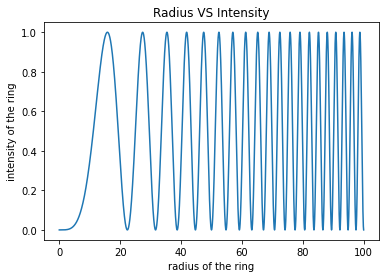

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in sqrt


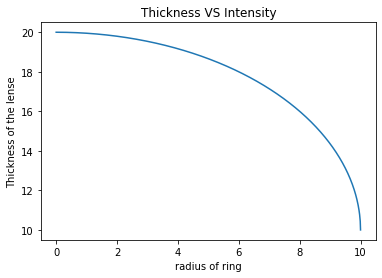

'© Ayush Chaudhari'

In [ ]:
dist = np.arange(0, 100, 0.01)
cor_intensity = intensity(dist, 50, 10)

plt.title("Radius VS Intensity")
plt.xlabel("radius of the ring")
plt.ylabel("intensity of the ring")
plt.plot(dist, cor_intensity)
plt.show()


thickness = r_to_t(dist, 10)
plt.title("Thickness VS Intensity")
plt.xlabel("radius of ring")
plt.ylabel("Thickness of the lense")

plt.plot(dist, thickness)
plt.show()
"""© Ayush Chaudhari"""